In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from landlab import RasterModelGrid, VoronoiDelaunayGrid, HexModelGrid
%matplotlib notebook

In [3]:
#We are interested in a raster model grid (DEMs) with square cells
#Defining a  raster model grid with ny rows and ny columns
nx = 4
ny = 3
dx = 1 #spacing between the nodes, equal in both direction, as this is a raster model grid
smg = RasterModelGrid((ny,nx), dx)

# important Convention
### It's good to store scalar or values without a horizontal direction (eg. elevation) in the nodes 
### and something like velocity or diffusion (which has a direction) in the links 


In [8]:
smg.y_of_link[[12]]

array([ 1.5])

In [10]:
smg.x_of_node[[3]]

array([ 3.])

In [12]:
smg.add_zeros('node','elevation',noclobber=False) #ask Sai what nclobber means here
smg.add_ones('link','velocity',noclobber=False)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [13]:
smg.add_zeros('link','slope',noclobber=False)
smg.at_link['slope']

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [14]:
smg.at_link['velocity']

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [15]:
smg.number_of_nodes

12

In [16]:
smg.number_of_links

17

In [17]:
for i in range(smg.number_of_nodes):
    print(i, smg.x_of_node[i],smg.y_of_node[i])

0 0.0 0.0
1 1.0 0.0
2 2.0 0.0
3 3.0 0.0
4 0.0 1.0
5 1.0 1.0
6 2.0 1.0
7 3.0 1.0
8 0.0 2.0
9 1.0 2.0
10 2.0 2.0
11 3.0 2.0


In [19]:
for i in range(smg.number_of_links):
    print('Link',i,': node',smg.node_at_link_tail[i],'===> node',smg.node_at_link_head[i])
    

Link 0 : node 0 ===> node 1
Link 1 : node 1 ===> node 2
Link 2 : node 2 ===> node 3
Link 3 : node 0 ===> node 4
Link 4 : node 1 ===> node 5
Link 5 : node 2 ===> node 6
Link 6 : node 3 ===> node 7
Link 7 : node 4 ===> node 5
Link 8 : node 5 ===> node 6
Link 9 : node 6 ===> node 7
Link 10 : node 4 ===> node 8
Link 11 : node 5 ===> node 9
Link 12 : node 6 ===> node 10
Link 13 : node 7 ===> node 11
Link 14 : node 8 ===> node 9
Link 15 : node 9 ===> node 10
Link 16 : node 10 ===> node 11


In [20]:
smg.core_nodes

array([5, 6])

In [22]:
smg.active_links

array([ 4,  5,  7,  8,  9, 11, 12])

In [23]:
#Nodes can be core, fixed value, fixed gradient, or closed (flux into or out of node is forbidden). 
#Links can be active (can carry flux), fixed (always carries the same flux; joined to a fixed gradient node)
#or inactive (forbidden from carrying flux). 


In [24]:
smg.fixed_value_boundary_nodes

array([ 0,  1,  2,  3,  4,  7,  8,  9, 10, 11])

In [25]:
smg.closed_boundary_nodes

array([], dtype=int64)

In [26]:
# Real Case grid
from landlab.io import read_esri_ascii

In [27]:
! gdal_translate -of AAIGrid /home/shashank/nobackup_shashank/CEWA_576/Run1_avalanche/N5_V4GDEM_ver2.tif elevation.asc

Input file size is 7541, 4205
0...10...20...30...40...50...60...70...80...90...100 - done.


In [35]:
(rmg_sq, z_sq) = read_esri_ascii('elevation.asc')

In [29]:
! gdaldem slope /home/shashank/nobackup_shashank/CEWA_576/Run1_avalanche/N5_V4GDEM_ver2.tif ./slope.tif
! gdal_translate -of AAIGrid ./slope.tif ./slope.asc

0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7541, 4205
0...10...20...30...40...50...60...70...80...90...100 - done.


In [41]:
rmg_sl, slope = read_esri_ascii('slope.asc')

In [37]:
z_sq

array([ 65535.,  65535.,  65535., ...,   4815.,   4797.,   4785.])

In [32]:
from landlab.plot import imshow_grid

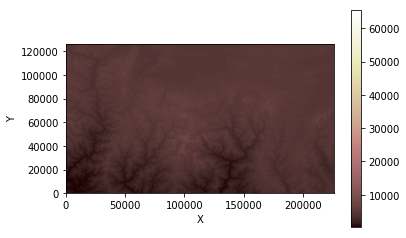

In [40]:
imshow_grid(rmg_sq,z_sq)

In [42]:
#this has no data need to remove those
#how to convert slope grid to slope links

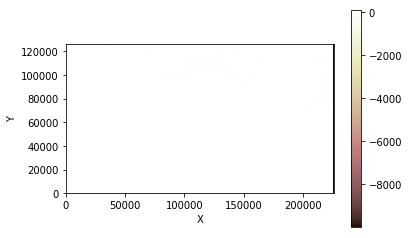

In [43]:
imshow_grid(rmg_sl,slope)

In [44]:
#can we do numpy style maths here

In [45]:
slope

array([-9999., -9999., -9999., ..., -9999., -9999., -9999.])

In [46]:
#do we go to mask array or replace these with np.nan, what does landlab wants?